In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DDOS.csv")
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df.shape

(225745, 79)

In [4]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [5]:
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
df[' Label'] = labelen.fit_transform(df[' Label'])

In [6]:
X=df.iloc[:,0:78]
y=df.iloc[:,78:79]

In [7]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [8]:
X.shape

(225745, 78)

In [9]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [10]:
y.shape

(225745, 1)

In [11]:
numeric_cols = X.iloc[:,1:].columns
X[numeric_cols] = (X[numeric_cols] - X[numeric_cols].mean()) / X[numeric_cols].std()

In [12]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,-0.515209,-0.186406,-0.210191,-0.285426,-0.151982,-0.285675,-0.13398,-0.314575,-0.269506,...,-0.188386,-0.355849,-0.231633,-0.061512,-0.231145,-0.226481,-0.472344,-0.283137,-0.478363,-0.39107
1,55054,-0.515206,-0.251245,-0.164225,-0.287272,-0.151829,-0.285675,-0.13398,-0.314575,-0.269506,...,-0.269885,-0.355849,-0.231633,-0.061512,-0.231145,-0.226481,-0.472344,-0.283137,-0.478363,-0.39107
2,55055,-0.515208,-0.251245,-0.164225,-0.287272,-0.151829,-0.285675,-0.13398,-0.314575,-0.269506,...,-0.269885,-0.355849,-0.231633,-0.061512,-0.231145,-0.226481,-0.472344,-0.283137,-0.478363,-0.39107
3,46236,-0.515208,-0.251245,-0.164225,-0.287272,-0.151829,-0.285675,-0.13398,-0.314575,-0.269506,...,-0.269885,-0.355849,-0.231633,-0.061512,-0.231145,-0.226481,-0.472344,-0.283137,-0.478363,-0.39107
4,54863,-0.515209,-0.186406,-0.210191,-0.285426,-0.151982,-0.285675,-0.13398,-0.314575,-0.269506,...,-0.188386,-0.355849,-0.231633,-0.061512,-0.231145,-0.226481,-0.472344,-0.283137,-0.478363,-0.39107


In [13]:
df.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
from xgboost import XGBClassifier

In [16]:
model = XGBClassifier(n_estimators=200, learning_rate=0.6, max_depth=10, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

Accuracy: 99.993%


<AxesSubplot:>

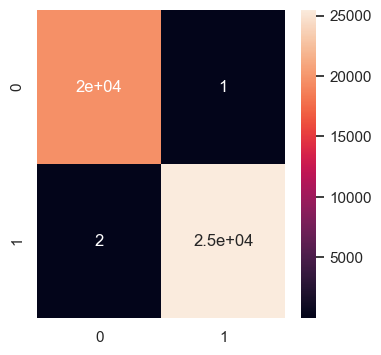

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(4,4)})
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,y_pred))
#0 - BENIGN
#1 - DDOS

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19674
           1       1.00      1.00      1.00     25475

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



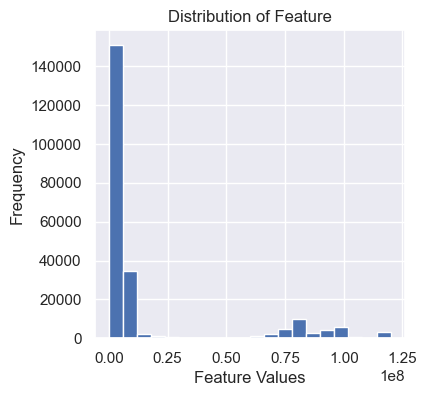

In [22]:
plt.hist(df[' Flow Duration'], bins=20)
plt.title('Distribution of Feature')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()

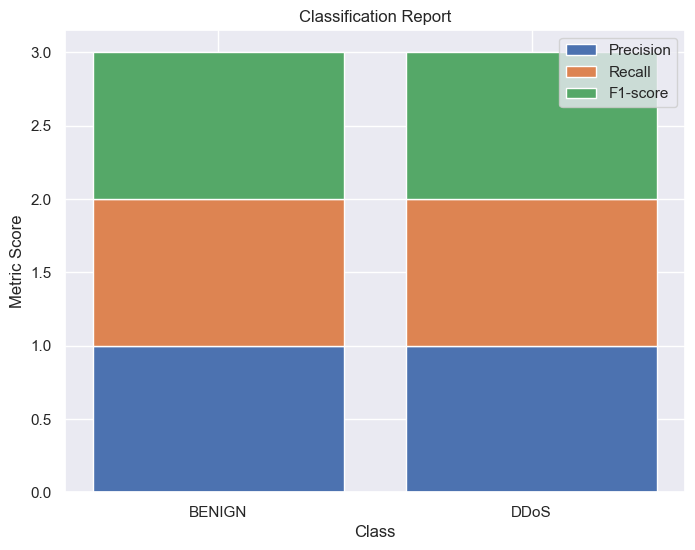

In [23]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate classification report
target_names = labelen.classes_
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# Extract metrics for each class
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {}
for metric in metrics:
    class_metrics[metric] = [report[label][metric] for label in target_names]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(target_names, class_metrics['precision'], label='Precision')
ax.bar(target_names, class_metrics['recall'], bottom=class_metrics['precision'], label='Recall')
ax.bar(target_names, class_metrics['f1-score'], bottom=[i+j for i,j in zip(class_metrics['precision'], class_metrics['recall'])], label='F1-score')
ax.set_xlabel('Class')
ax.set_ylabel('Metric Score')
ax.set_title('Classification Report')
ax.legend()
plt.show()